<h1>Task 1 - Exploratory Data Analysis</h1>

<h2>Background Information</h2>

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions. The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

<h2>Task Brief</h2>

Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar). Start by doing some basic checks – are there any data issues? Does the data need to be cleaned? Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average? Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

In [1]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms as transforms
import seaborn as sns

# Set up seaborn for plots:
sns.set()
sns.set_style('white')

# Ensure all plots are high resolution (than the default)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

<h3>Importing The Dataset</h3>

In [2]:
# Read in the excel file:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head(20)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


Checking out the initial names of the columns incase we need to rename any of them for easier access to columns in the dataframe. In this case, the column names are lowercase and follow a snakecase convention. Hence, no need to change any of them.

In [3]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

<h3>Dataset Description</h3>

- <b>Status:</b> Indicates the state of the transaction between the merchant and the purchaser. ```Authorized``` indicates that the merchant has sent a request to the relevant bank institution to determine the available bank balance and results in a preliminary account deduction in the purchaser's account. The ```posted``` status indicates the final amount of the completed transaction sent by the merchant to the purchasers account.
- <b>card_present_flag:</b> Indicates whether or not the customer was able to physically present a card to the merchant when a purchase/transaction has been made. When equal to 0, the transaction may have been made by an alternative method such as <i>CNP, MO/TO, Mail Order / Telephone Order, MOTOEC</i>. 
- <b>bpay_biller_code:</b> stands for bill payments which are might be directly through the internet, mobile or phone banking. Customer has unique BPAY Biller Code, and this feature can be used with that code and Customers’ Reference Number to pay.
- <b>account:</b> A unique code for each account.
- <b>currency:</b> The currency used for all transactions. For all the dataset the currency is AUD. Thats why the currency column will not be used for further analysis.
- <b>long_lat:</b> Stands for where the customers live as in longitudes and latitudes.
- <b>txn_description</b> Stands for which way the transactions occured. For example, Inter Bank, Phone Bank etc.
- <b>merchant_id:</b> Stands for a unique code given to a business by payment processors before a merchants begin processing credit cards.
- <b>merchant_code:</b> Stands for a four-digit number listed in ISO 18245 for retail financial services.
- <b>first_name:</b> Stands for Customers’ first names.
- <b>balance</b> Stands for how much money customers’ have in their account.
- <b>date:</b> Stands for which date the transaction occured.
- <b>gender:</b> Indicates the customers’ gender.
- <b>age:</b> Indicates the customers’ ages.
- <b>merchant suburb:</b> Stands for where the transaction occured as in suburbs.
- <b>merchant_state:</b> Stands for where the transaction occured as in states.
- <b>extraction:</b> stands for when the transactions occured, the date with the time(hms)
- <b>amount:</b> stands for how much money the customers spent in each transactions
- <b>transaction_id</b> is a unique code for each transactions.
- <b>country:</b> stands for where all the transactions occured. For all dataset the country is Australia. Thats why country column will not be in the next steps.
- <b>customer_id</b> is a unique code for each customers.
- <b>merchant_long_lat:</b> stands for where the transactions occured as in longitudes and latitudes.
- <b>movement:</b> stands for the type of the account as in debit or credit card.

<h3>Data Cleaning Procedure</h3>

There are certain columns that are redundant when we come to the data exploration/analysis portion of the project. Columns that carry objects (strings) that are unique to a particular row carry no trends and, hence, can be safely removed from the  dataset. Some columns also comprise of primarily ```NaN``` values and can be removed as well.

The first column to investigate is the ```bpay_biller_code```. In general, not every customer has a BPay Biller Code so we should expect that it does not carry any useful information.

<h4>Investigating "bpay_biller_code"</h4>

In [4]:
print("The length of the 'bpay_biller_code' column = {}".format(len(df['bpay_biller_code'])))
print("The number of NaN values in the columns is = {}".format(np.sum(df['bpay_biller_code'].isna())))
print("Number of non-NaN values in the column = {}\n".format( len(df['bpay_biller_code']) - np.sum(df['bpay_biller_code'].isna()) ))
print("The non-NaN values in the column are shown below:\n")

# Find all entries in the bpay_biller_code column that are NOT NaN values. Use the "~" operator to get the complement result
boolean = ~(df['bpay_biller_code'].isna())

# Filter the column for all non-NaN values:
tmp = df[boolean]['bpay_biller_code'].value_counts()

tmp

The length of the 'bpay_biller_code' column = 12043
The number of NaN values in the columns is = 11158
Number of non-NaN values in the column = 885

The non-NaN values in the column are shown below:



0                                        883
 THE DISCOUNT CHEMIST GROUP                1
 LAND WATER & PLANNING East Melbourne      1
Name: bpay_biller_code, dtype: int64

Out of the 885 non-```NaN``` entries that were filtered, 883 of them were '0'. This most likely means the ```NaN``` and 0 values represent the same thing. That is, all those rows represent a customer (or customers) that do not have a BPay biller code. There remains to be TWO customers that have one. This should suffice as a reason to omit this column since most customers do not have a code. This removal is done below:

In [5]:
df = df.drop('bpay_biller_code', axis=1)
df

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,1705.43,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,1248.36,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,1232.75,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,213.16,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,466.58,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


<h4>Investigating 'merchant_id' and 'transaction_id'</h4>

Columns like ```merchant_id``` and ```transaction_id``` comprise of string values that cannot be easily used for anything like a pivot table in the latter part of the project. We remove these columns as well.

In [6]:
df = df.drop(['merchant_id', 'transaction_id'], axis=1)
df

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,NaN,Kristin,1248.36,2018-08-01,F,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,ACC-2776252858,AUD,144.95 -37.76,POS,NaN,Kristin,1232.75,2018-08-01,F,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,ACC-182446574,AUD,116.06 -32.00,POS,NaN,Tonya,213.16,2018-08-01,F,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,Michael,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,Australia,CUS-2031327464,NaN,debit


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 20 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
country              12043 non-null object
customer_id          12043 non-null object
merchant_long_lat    7717 non-null object
movement             12043 non-null object
dtypes: datetime64[ns](1),

<h4>Investigating 'merchant_code'</h4>

We might as well drop the ```merchant_code``` column as we only have 883 non-null (non-```NaN``` values) out the total 12043 rows in the whole dataframe.

In [8]:
df = df.drop(['merchant_code'], axis=1)
df

,status,card_present_flag,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,Kristin,1248.36,2018-08-01,F,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,ACC-2776252858,AUD,144.95 -37.76,POS,Kristin,1232.75,2018-08-01,F,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,ACC-182446574,AUD,116.06 -32.00,POS,Tonya,213.16,2018-08-01,F,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,Michael,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,Australia,CUS-2031327464,NaN,debit


<h4>Currency, Country and First Name Column</h4>

Because the main currency used by all customers in the dataset is the AUD, the ```currency``` column is redundant for any form of analysis. We can omit this feature and drop this column from the dataset. Same applies for the ```country``` column. For the ```first_name``` column, no useful information will come from the first name of the customers. We are safe to drop this column as well.

In [9]:
df = df.drop(["currency", 'country', 'first_name'], axis=1)
df

,status,card_present_flag,account,long_lat,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,ACC-1608363396,151.22 -33.87,PAYMENT,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,CUS-2688605418,NaN,debit
6,authorized,1.0,ACC-2776252858,144.95 -37.76,SALES-POS,1248.36,2018-08-01,F,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,ACC-2776252858,144.95 -37.76,POS,1232.75,2018-08-01,F,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,ACC-182446574,116.06 -32.00,POS,213.16,2018-08-01,F,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,ACC-602667573,151.23 -33.96,INTER BANK,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,CUS-2031327464,NaN,debit


<h4>'Extraction' Datetime Conversion</h4>

The ```extraction``` column currently contains datetime objects in a ```Year-Month-Day``` concatenated with ```Hour-Minute-Seconds``` which is joined to a time-offset ```+0000```. Since the time-offsets are always the same for all customers the the 'fractional' seconds are all the same for all customers, we can safely pull out only the hours, minutes and seconds from the extraction datetimes.

In [10]:
import datetime as dt

# Pull out the extraction column as a temporary list:
extract_tmp = list(df['extraction'])
new_extract = []
extract_tmp_new = []

# Now, extract all elements of the datetime:
for dt_obj in extract_tmp:
    dt_obj_tmp = dt.datetime.strptime(dt_obj, "%Y-%m-%dT%H:%M:%S.000+0000")
    new_extract.append(dt_obj_tmp)

# Then, for each element in new_extract, convert to a more human-readable datetime:
for dt_obj in new_extract:
    tmp = dt.datetime.strftime(dt_obj, "%Y-%m-%d %H:%M:%S")
    extract_tmp_new.append(tmp)

df['extraction_dt'] = pd.Series(extract_tmp_new)

In [11]:
# Rearranging some of the columns before proceeding:
new_cols = ['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'balance', 'date', 'extraction_dt', 'gender', 'age', 'merchant_suburb', 'merchant_state',
       'extraction', 'amount', 'customer_id', 'merchant_long_lat', 'movement']

df = df[new_cols]

# Drop the original extraction column since we have a better readable version of the column:
df = df.drop('extraction', axis=1)

In [12]:
df

,status,card_present_flag,account,long_lat,txn_description,balance,date,extraction_dt,gender,age,merchant_suburb,merchant_state,amount,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,35.39,2018-08-01,2018-08-01 01:01:15,F,26,Ashmore,QLD,16.25,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,21.20,2018-08-01,2018-08-01 01:13:45,F,26,Sydney,NSW,14.19,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,5.71,2018-08-01,2018-08-01 01:26:15,M,38,Sydney,NSW,6.42,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,2117.22,2018-08-01,2018-08-01 01:38:45,F,40,Buderim,QLD,40.90,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,17.95,2018-08-01,2018-08-01 01:51:15,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,ACC-1608363396,151.22 -33.87,PAYMENT,1705.43,2018-08-01,2018-08-01 02:00:00,M,20,NaN,NaN,163.00,CUS-2688605418,NaN,debit
6,authorized,1.0,ACC-2776252858,144.95 -37.76,SALES-POS,1248.36,2018-08-01,2018-08-01 02:23:04,F,43,Kalkallo,VIC,61.06,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,ACC-2776252858,144.95 -37.76,POS,1232.75,2018-08-01,2018-08-01 04:11:25,F,43,Melbourne,VIC,15.61,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,ACC-182446574,116.06 -32.00,POS,213.16,2018-08-01,2018-08-01 04:40:00,F,27,Yokine,WA,19.25,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,ACC-602667573,151.23 -33.96,INTER BANK,466.58,2018-08-01,2018-08-01 06:00:00,M,40,NaN,NaN,21.00,CUS-2031327464,NaN,debit


<h4>Latitude and Longitude Formatting</h4>

At the moment, the latitude and longitude of the customers and the merchants are concatenated as one string object under their respectively columns. Conventionally, the latitudes and longitudes are separated into their own individual columns. For both ```long_lat``` and ```merchant_long_lat```, the latitude and longitude coordinates are split by a single whitespace. We can use the whitespace to attain the latitude and longitude, append to their individual lists and then form them into pandas series which we can then append onto the dataframe.

In [13]:
# Pull the long and lat columns from the dataframe
long_lat = df['long_lat']
merchant_long_lat = df['merchant_long_lat'].fillna('0 0')

# Create lists to store the long and lat coordinates:
long = []
lat = []
merchant_long = []
merchant_lat = []

# Using a for-loop, cycle through the long_lat list and extract the long and lat coords. Append to the appropriate list
for coord in long_lat:
    tmp = coord.split() # Split coords at white space. 'tmp' contains two elements
    long.append(tmp[0])
    lat.append(tmp[1])
    
# Do the same thing for the merchant's long-lat:
for coord in merchant_long_lat:
    tmp = coord.split()
    merchant_long.append(tmp[0])
    merchant_lat.append(tmp[1])
    
# Final step, convert all the long and lat lists into pandas series and append to the original dataframe:
long = pd.Series(long)
lat = pd.Series(lat)
merchant_long = pd.Series(merchant_long)
merchant_lat = pd.Series(merchant_lat)

# Hence...
df['long'] = long
df['lat'] = lat
df['merchant_long'] = merchant_long
df['merchant_lat'] = merchant_lat


In [14]:
# Rearrange the column names to appropriate positions and remove redundant columns:
rearrange_cols = ['status', 'card_present_flag', 'account', 'long', 'lat', 'txn_description',
       'balance', 'date', 'extraction_dt', 'gender', 'age', 'merchant_suburb',
       'merchant_state', 'amount', 'customer_id', 'merchant_long', 'merchant_lat',
       'movement']

df = df[rearrange_cols]


In [15]:
df

,status,card_present_flag,account,long,lat,txn_description,balance,date,extraction_dt,gender,age,merchant_suburb,merchant_state,amount,customer_id,merchant_long,merchant_lat,movement
0,authorized,1.0,ACC-1598451071,153.41,-27.95,POS,35.39,2018-08-01,2018-08-01 01:01:15,F,26,Ashmore,QLD,16.25,CUS-2487424745,153.38,-27.99,debit
1,authorized,0.0,ACC-1598451071,153.41,-27.95,SALES-POS,21.20,2018-08-01,2018-08-01 01:13:45,F,26,Sydney,NSW,14.19,CUS-2487424745,151.21,-33.87,debit
2,authorized,1.0,ACC-1222300524,151.23,-33.94,POS,5.71,2018-08-01,2018-08-01 01:26:15,M,38,Sydney,NSW,6.42,CUS-2142601169,151.21,-33.87,debit
3,authorized,1.0,ACC-1037050564,153.10,-27.66,SALES-POS,2117.22,2018-08-01,2018-08-01 01:38:45,F,40,Buderim,QLD,40.90,CUS-1614226872,153.05,-26.68,debit
4,authorized,1.0,ACC-1598451071,153.41,-27.95,SALES-POS,17.95,2018-08-01,2018-08-01 01:51:15,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,153.44,-28.06,debit
5,posted,NaN,ACC-1608363396,151.22,-33.87,PAYMENT,1705.43,2018-08-01,2018-08-01 02:00:00,M,20,NaN,NaN,163.00,CUS-2688605418,0,0,debit
6,authorized,1.0,ACC-2776252858,144.95,-37.76,SALES-POS,1248.36,2018-08-01,2018-08-01 02:23:04,F,43,Kalkallo,VIC,61.06,CUS-4123612273,144.95,-37.53,debit
7,authorized,1.0,ACC-2776252858,144.95,-37.76,POS,1232.75,2018-08-01,2018-08-01 04:11:25,F,43,Melbourne,VIC,15.61,CUS-4123612273,144.96,-37.81,debit
8,authorized,1.0,ACC-182446574,116.06,-32.00,POS,213.16,2018-08-01,2018-08-01 04:40:00,F,27,Yokine,WA,19.25,CUS-3026014945,115.85,-31.9,debit
9,posted,NaN,ACC-602667573,151.23,-33.96,INTER BANK,466.58,2018-08-01,2018-08-01 06:00:00,M,40,NaN,NaN,21.00,CUS-2031327464,0,0,debit


<h4>'card_present_flag' Column</h4>

In [16]:
df['card_present_flag'].value_counts(dropna=False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

We can see that a significant portion of the ```card_present_flag``` columns are ```NaN``` values. For this reason, we are safe to drop this column as well.

In [17]:
df = df.drop('card_present_flag', axis=1)

In [18]:
df

,status,account,long,lat,txn_description,balance,date,extraction_dt,gender,age,merchant_suburb,merchant_state,amount,customer_id,merchant_long,merchant_lat,movement
0,authorized,ACC-1598451071,153.41,-27.95,POS,35.39,2018-08-01,2018-08-01 01:01:15,F,26,Ashmore,QLD,16.25,CUS-2487424745,153.38,-27.99,debit
1,authorized,ACC-1598451071,153.41,-27.95,SALES-POS,21.20,2018-08-01,2018-08-01 01:13:45,F,26,Sydney,NSW,14.19,CUS-2487424745,151.21,-33.87,debit
2,authorized,ACC-1222300524,151.23,-33.94,POS,5.71,2018-08-01,2018-08-01 01:26:15,M,38,Sydney,NSW,6.42,CUS-2142601169,151.21,-33.87,debit
3,authorized,ACC-1037050564,153.10,-27.66,SALES-POS,2117.22,2018-08-01,2018-08-01 01:38:45,F,40,Buderim,QLD,40.90,CUS-1614226872,153.05,-26.68,debit
4,authorized,ACC-1598451071,153.41,-27.95,SALES-POS,17.95,2018-08-01,2018-08-01 01:51:15,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,153.44,-28.06,debit
5,posted,ACC-1608363396,151.22,-33.87,PAYMENT,1705.43,2018-08-01,2018-08-01 02:00:00,M,20,NaN,NaN,163.00,CUS-2688605418,0,0,debit
6,authorized,ACC-2776252858,144.95,-37.76,SALES-POS,1248.36,2018-08-01,2018-08-01 02:23:04,F,43,Kalkallo,VIC,61.06,CUS-4123612273,144.95,-37.53,debit
7,authorized,ACC-2776252858,144.95,-37.76,POS,1232.75,2018-08-01,2018-08-01 04:11:25,F,43,Melbourne,VIC,15.61,CUS-4123612273,144.96,-37.81,debit
8,authorized,ACC-182446574,116.06,-32.00,POS,213.16,2018-08-01,2018-08-01 04:40:00,F,27,Yokine,WA,19.25,CUS-3026014945,115.85,-31.9,debit
9,posted,ACC-602667573,151.23,-33.96,INTER BANK,466.58,2018-08-01,2018-08-01 06:00:00,M,40,NaN,NaN,21.00,CUS-2031327464,0,0,debit


<h4>'merchant_state' and 'merchant_suburb' Column</h4>

This column contains the state with which the merchant is located at. However, we already have the latitude and longitude, so the state might not be necessary. Also, as we see below, there are a significant number of rows that do not have a specified state. In the same way, those entries also do not have a corresponding entry in the ```merchant_suburb``` column. Hence, we should be safe to drop these two columns.

In [19]:
df['merchant_state'].value_counts(dropna=False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [20]:
df = df.drop(['merchant_state', 'merchant_suburb'], axis=1)
df.head()

,status,account,long,lat,txn_description,balance,date,extraction_dt,gender,age,amount,customer_id,merchant_long,merchant_lat,movement
0,authorized,ACC-1598451071,153.41,-27.95,POS,35.39,2018-08-01,2018-08-01 01:01:15,F,26,16.25,CUS-2487424745,153.38,-27.99,debit
1,authorized,ACC-1598451071,153.41,-27.95,SALES-POS,21.20,2018-08-01,2018-08-01 01:13:45,F,26,14.19,CUS-2487424745,151.21,-33.87,debit
2,authorized,ACC-1222300524,151.23,-33.94,POS,5.71,2018-08-01,2018-08-01 01:26:15,M,38,6.42,CUS-2142601169,151.21,-33.87,debit
3,authorized,ACC-1037050564,153.10,-27.66,SALES-POS,2117.22,2018-08-01,2018-08-01 01:38:45,F,40,40.90,CUS-1614226872,153.05,-26.68,debit
4,authorized,ACC-1598451071,153.41,-27.95,SALES-POS,17.95,2018-08-01,2018-08-01 01:51:15,F,26,3.25,CUS-2487424745,153.44,-28.06,debit


<h2>Basic Data Analysis</h2>

Now that the data is now much cleaner than what we started with, we are ready to begin some simple analysis on the data. Some of the basic questions to answer in this project are:

- What is the average transaction amount? 
- How many transactions do customers make each month, on average?
- Segment the dataset by transaction date and time and visualise transaction volume and spending over the course of an average day or week. 

<h3>Average Transaction Amount</h3>

The mean transaction amount can be computed via the ```amount``` column of the dataframe. We can also visualise the distribution in the transaction amounts via a box-and-whisker plot. We do this in the proceeding code cell.

In [21]:
mean_transaction = df['amount'].mean()
print("The mean transaction amount = ${}".format(round(mean_transaction, 2)))

The mean transaction amount = $187.93


In [22]:
# Statistics for the transaction amount:
df['amount'].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

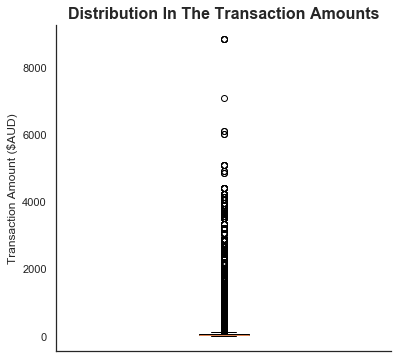

In [23]:
# Plotting the distribution in the transaction amounts:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Distribution In The Transaction Amounts", fontsize=16, fontweight='bold')
ax.set_ylabel("Transaction Amount ($AUD)")
ax.get_xaxis().set_visible(False)
ax.boxplot(df['amount'])
sns.despine()
plt.savefig('trans_dist.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

We can see that while the average transaction amount is $187.93, the presence of transaction amounts at large outlier amounts causes the distribution to be greatly skewed as shown above. In other words, the mean transaction amount does not accurately represent the average transaction amount in this dataset.

<h3>How Many Transactions Per Month?</h3>

The dataset accounts for transactions that occur between August 1st to October 31st. We need to partition the dataframe by the month and then compute the mean transaction amount made in each month.

In [24]:
df.head()

,status,account,long,lat,txn_description,balance,date,extraction_dt,gender,age,amount,customer_id,merchant_long,merchant_lat,movement
0,authorized,ACC-1598451071,153.41,-27.95,POS,35.39,2018-08-01,2018-08-01 01:01:15,F,26,16.25,CUS-2487424745,153.38,-27.99,debit
1,authorized,ACC-1598451071,153.41,-27.95,SALES-POS,21.20,2018-08-01,2018-08-01 01:13:45,F,26,14.19,CUS-2487424745,151.21,-33.87,debit
2,authorized,ACC-1222300524,151.23,-33.94,POS,5.71,2018-08-01,2018-08-01 01:26:15,M,38,6.42,CUS-2142601169,151.21,-33.87,debit
3,authorized,ACC-1037050564,153.10,-27.66,SALES-POS,2117.22,2018-08-01,2018-08-01 01:38:45,F,40,40.90,CUS-1614226872,153.05,-26.68,debit
4,authorized,ACC-1598451071,153.41,-27.95,SALES-POS,17.95,2018-08-01,2018-08-01 01:51:15,F,26,3.25,CUS-2487424745,153.44,-28.06,debit


In [25]:
# Filter all August transactions
tmp_bool = (df['date'] >= '2018-08-01') & (df['date'] <= '2018-08-31')
df_aug = df[tmp_bool]
aug_trans_mean = df_aug['amount'].mean()

# Filter all September transactions
tmp_bool2 = (df['date'] >= '2018-09-01') & (df['date'] <= '2018-09-30')
df_sep = df[tmp_bool2]
sep_trans_mean = df_sep['amount'].mean()

# Filter all October transactions
tmp_bool = (df['date'] >= '2018-10-01') & (df['date'] <= '2018-10-31')
df_oct = df[tmp_bool]
oct_trans_mean = df_oct['amount'].mean()

print("The mean transaction amount in August = ${}".format(round(aug_trans_mean, 2)))
print("The mean transaction amount in September = ${}".format(round(sep_trans_mean, 2)))
print("The mean transaction amount in October = ${}".format(round(oct_trans_mean, 2)))

The mean transaction amount in August = $185.12
The mean transaction amount in September = $182.05
The mean transaction amount in October = $196.43


We may want to visualise the spending made everyday in a particular month. To do this, we need to convert the month-based dataframes into pivot tables and sum all transactions made on a particular day (this computes the transaction volume per day). From here, we can then make a time-series graph to visualise the trend in transactions on a daily basis.

In [26]:
pt_aug = df_aug.pivot_table(index='date', values='amount', aggfunc=np.sum, fill_value=0)
pt_aug = pt_aug.reset_index()

pt_sep = df_sep.pivot_table(index='date', values='amount', aggfunc=np.sum, fill_value=0)
pt_sep = pt_sep.reset_index()

pt_oct = df_oct.pivot_table(index='date', values='amount', aggfunc=np.sum, fill_value=0)
pt_oct = pt_oct.reset_index()

In [27]:
# Compute the mean daily transaction volume
aug_trans_vol_mean = round(float(pt_aug['amount'].mean()), 2)
print("Mean Daily Transaction Volume In August = ${}".format(float(aug_trans_vol_mean)))

sep_trans_vol_mean = round(float(pt_sep['amount'].mean()), 2)
print("Mean Daily Transaction Volume In September = ${}".format(float(sep_trans_vol_mean)))

oct_trans_vol_mean = round(float(pt_oct['amount'].mean()), 2)
print("Mean Daily Transaction Volume In October = ${}".format(float(oct_trans_vol_mean)))

Mean Daily Transaction Volume In August = $24331.18
Mean Daily Transaction Volume In September = $24351.67
Mean Daily Transaction Volume In October = $25896.72


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


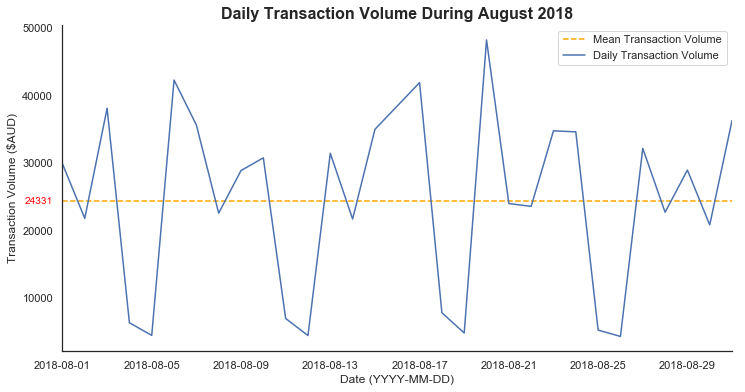

In [28]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Daily Transaction Volume During August 2018", fontsize=16, fontweight='bold')
ax.set_ylabel('Transaction Volume ($AUD)')
ax.set_xlabel('Date (YYYY-MM-DD)')
ax.axhline(aug_trans_vol_mean, label='Mean Transaction Volume', color='orange', linestyle='--')

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,aug_trans_vol_mean, "{:.0f}".format(aug_trans_vol_mean), color="red", transform=trans, 
        ha="right", va="center")

ax.plot(pt_aug['date'], pt_aug['amount'], label='Daily Transaction Volume')
ax.set_xlim([pt_aug['date'][0], pt_aug['date'][len(pt_aug)-1]])
ax.legend()
sns.despine()

plt.savefig('daily_aug_trans.svg', bbox_inches='tight', dpi=300, transparent=True)

plt.show()

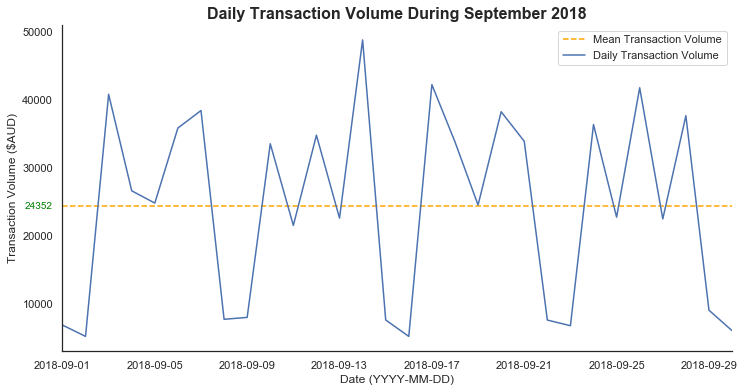

In [29]:
fig, ax= plt.subplots(figsize=(12,6))
ax.set_title("Daily Transaction Volume During September 2018", fontsize=16, fontweight='bold')
ax.set_ylabel('Transaction Volume ($AUD)')
ax.set_xlabel('Date (YYYY-MM-DD)')
ax.axhline(sep_trans_vol_mean, label='Mean Transaction Volume', color='orange', linestyle='--')

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,sep_trans_vol_mean, "{:.0f}".format(sep_trans_vol_mean), color="green", transform=trans, 
        ha="right", va="center")

ax.plot(pt_sep['date'], pt_sep['amount'], label='Daily Transaction Volume')
ax.set_xlim([pt_sep['date'][0], pt_sep['date'][len(pt_sep)-1]])
plt.legend()
sns.despine()

plt.savefig('daily_sep_trans.svg', bbox_inches='tight', dpi=300, transparent=True)

plt.show()

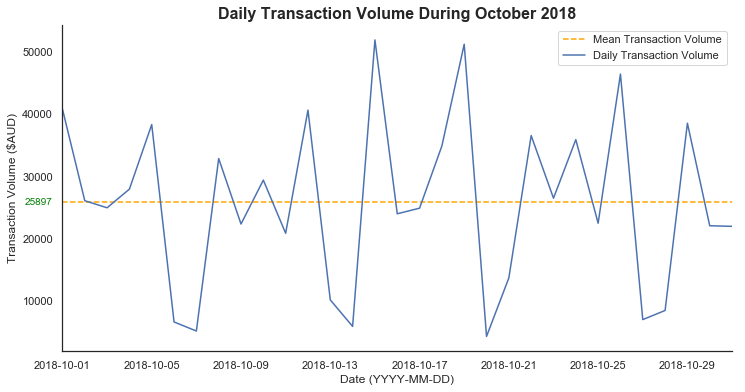

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Daily Transaction Volume During October 2018", fontsize=16, fontweight='bold')
ax.set_ylabel('Transaction Volume ($AUD)')
ax.set_xlabel('Date (YYYY-MM-DD)')
ax.axhline(oct_trans_vol_mean, label='Mean Transaction Volume', color='orange', linestyle='--')

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,oct_trans_vol_mean, "{:.0f}".format(oct_trans_vol_mean), color="green", transform=trans, 
        ha="right", va="center")

plt.plot(pt_oct['date'], pt_oct['amount'], label='Daily Transaction Volume')
ax.set_xlim([pt_oct['date'][0], pt_oct['date'][len(pt_oct)-1]])
plt.legend()
sns.despine()

plt.savefig('daily_oct_trans.svg', bbox_inches='tight', dpi=300, transparent=True)

plt.show()

<h3>Transaction Volume Throughout The Entire Duration</h3>

In [31]:
pt_whole = df.pivot_table(index='date', values='amount', aggfunc=np.sum, fill_value=0)
pt_whole = pt_whole.reset_index()
pt_whole.head(5)

,date,amount
0,2018-08-01,29867.94
1,2018-08-02,21786.32
2,2018-08-03,38096.58
3,2018-08-04,6296.05
4,2018-08-05,4426.50


In [32]:
mean_trans_vol_whole = pt_whole['amount'].mean()
print("Mean transaction volume for the whole duration = ${}".format(round(mean_trans_vol_whole,2)))

Mean transaction volume for the whole duration = $24871.25


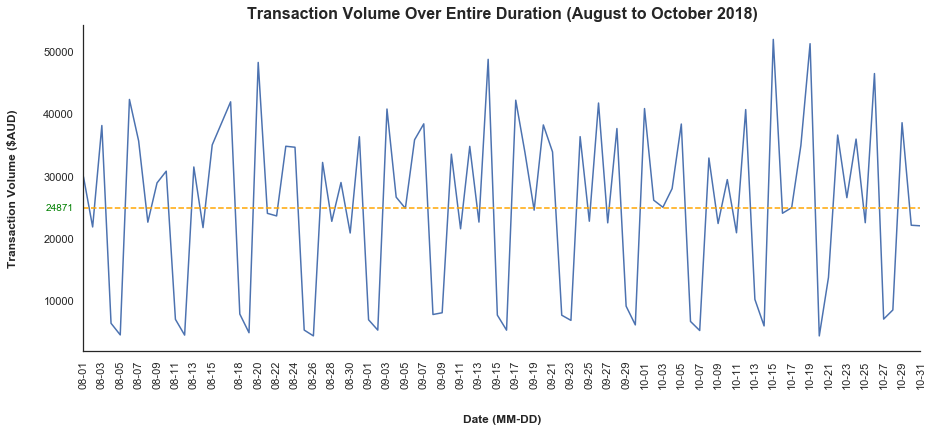

In [33]:
from datetime import timedelta
import matplotlib.dates as mdates
import matplotlib.transforms as transforms

min_x = pt_whole['date'][0]
max_x = pt_whole['date'][len(pt_whole) - 1]
        
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(pt_whole['date'], pt_whole['amount'])
ax.axhline(mean_trans_vol_whole, linestyle='--', c='orange')
# ax.axhline(max(pt_whole['amount']), linestyle='--', c='orange')
# ax.axhline(min(pt_whole['amount']), linestyle='--', c='orange')

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,mean_trans_vol_whole, "{:.0f}".format(mean_trans_vol_whole), color="green", transform=trans, 
        ha="right", va="center")

ax.set_xticklabels(pt_whole['date'], rotation=90)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax.set_title('Transaction Volume Over Entire Duration (August to October 2018)', fontsize=16, fontweight='bold')
ax.set_ylabel('Transaction Volume ($AUD)', fontweight='bold', labelpad=25)
ax.set_xlabel('Date (MM-DD)', fontweight='bold', labelpad=25)

ax.set_xticks(pt_whole['date'])
ax.set_xticks(ax.get_xticks()[::2])

ax.set_xlim([min(pt_whole['date']), max(pt_whole['date'])])

sns.despine()

plt.savefig('daily_whole_trans.svg', bbox_inches='tight', dpi=300, transparent=True)

plt.show()

<h2>Location Information</h2>

We can also use the latitude and longitude coordinates in the dataset to plot the location of all the customers and merchants in the dataset. It is expected that we will have a clearer picture of <i>where</i> in Australia most of the transactions originate form.

In [34]:
x = list(df['long'].astype(float))
y = list(df['lat'].astype(float))

x_m = list(df['merchant_long'].astype(float))
y_m = list(df['merchant_lat'].astype(float))

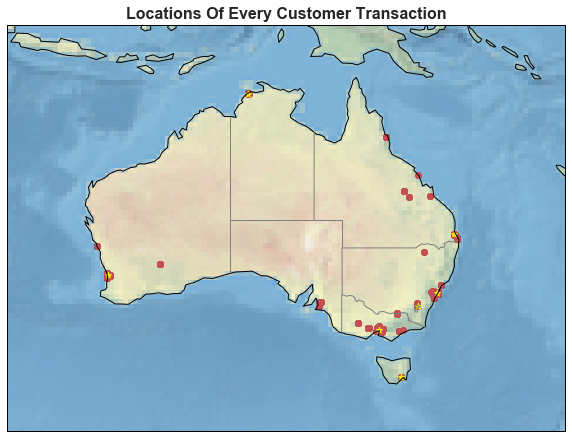

In [35]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeat.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.RIVERS)
ax.add_feature(states_provinces, edgecolor='gray')

ax.set_extent([105, 165, -5, -45])

ax.set_title('Locations Of Every Customer Transaction', fontsize=16, fontweight='bold')
ax.scatter(x,y, c='r', s=25)
ax.scatter(151.2093, -33.8688, c='yellow', marker='*', s=40, alpha=0.85) # Sydney
ax.scatter(144.9631, -37.8136, c='yellow', marker='*', s=40, alpha=0.85) # Melbourne
ax.scatter(115.8605, -31.9505, c='yellow', marker='*', s=40, alpha=0.85) # Perth
ax.scatter(130.8456, -12.4634, c='yellow', marker='*', s=40, alpha=0.85) # Darwin
ax.scatter(153.0251, -27.4698, c='yellow', marker='*', s=40, alpha=0.85) # Brisbane
ax.scatter(147.3272, -42.8821, c='yellow', marker='*', s=40, alpha=0.85) # Hobart
ax.scatter(149.1300, -35.2809, c='yellow', marker='*', s=40, alpha=0.85) # Canberra

plt.savefig('cust_trans_loc.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

Unsuprisingly, we can see that majority of transactions made by customers are concentrated at the main cities of each state. In this case, we can see a high density of transactions made in Sydney and Melbourne for example. All the main cities of each state have been indicated with a yellow star as a reference.

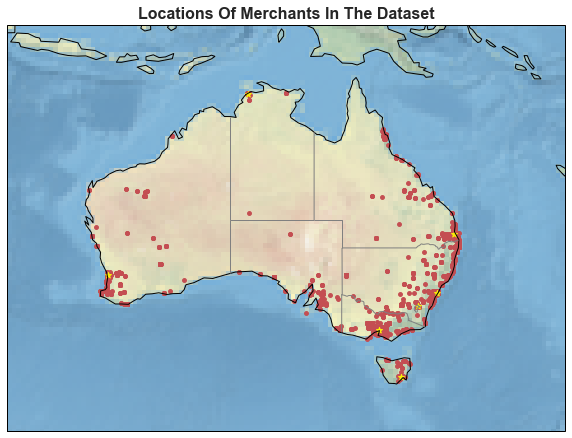

In [36]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeat.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.RIVERS)
ax.add_feature(states_provinces, edgecolor='gray')

ax.set_extent([105, 165, -5, -45])

ax.set_title('Locations Of Merchants In The Dataset', fontsize=16, fontweight='bold')
ax.scatter(x_m, y_m, c='r', s=15)
ax.scatter(151.2093, -33.8688, c='yellow', marker='*', s=40, alpha=0.85) # Sydney
ax.scatter(144.9631, -37.8136, c='yellow', marker='*', s=40, alpha=0.85) # Melbourne
ax.scatter(115.8605, -31.9505, c='yellow', marker='*', s=40, alpha=0.85) # Perth
ax.scatter(130.8456, -12.4634, c='yellow', marker='*', s=40, alpha=0.85) # Darwin
ax.scatter(153.0251, -27.4698, c='yellow', marker='*', s=40, alpha=0.85) # Brisbane
ax.scatter(147.3272, -42.8821, c='yellow', marker='*', s=40, alpha=0.85) # Hobart
ax.scatter(149.1300, -35.2809, c='yellow', marker='*', s=40, alpha=0.85) # Canberra

plt.savefig('merch_trans_loc.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

The above map shows the locations of all merchants that have made transactions with customers in the dataset. We can see that the sparcity of the merchant locations is greater than that exhibited by that in the geographic scatter plot for the customers. We can see merchants exist within rural areas of the states and not necessarily concentrated at the main cities in those states. This suggests that transactions and purchases made need not have been in person. In other words, payments may have been made online, by phone, inter-bank transaction etc. We can see the distribution in the transaction/payment method via the ```txn_description``` column.

<h2>Distribution In The Transaction/Payment Method</h2>

In [37]:
df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

From the above, we can see that the methods of transaction are:

- POS (Point of Service) Transaction: Customer tenders payment in exchange for a good/service. Same thing for SALES-POS
- PAYMENT: Refers to a direct payment of cash from one person to another.
- INTER-BANK: Refers to any transaction may BETWEEN bank institutions. It sets the basis for interest rates and the Cash Rate.
- PAY/SALARY: Transactions made from employers to employees as part of their wages/salary. 
- PHONE BANK: Transactions made by phone services.

In [38]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

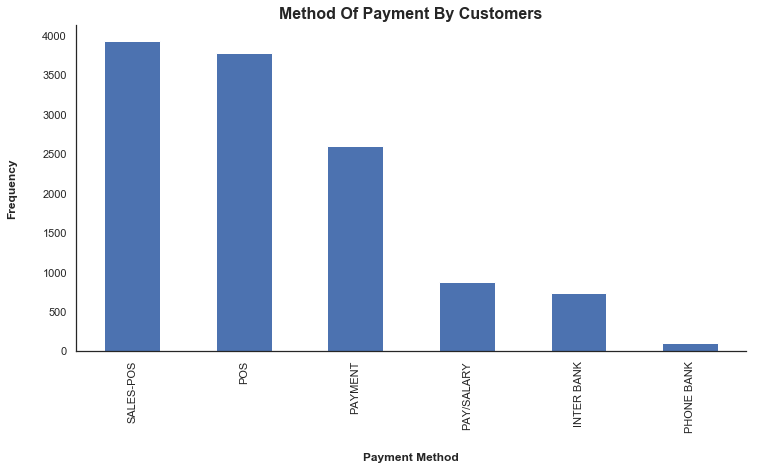

In [39]:
fig = plt.figure(figsize=(12,6))
df['txn_description'].value_counts().plot(kind='bar')
plt.title("Method Of Payment By Customers", fontsize=16, fontweight='bold')
plt.xlabel('Payment Method', fontweight='bold', labelpad=20)
plt.ylabel('Frequency', fontweight='bold', labelpad=25)
sns.despine()

plt.savefig('pay_meth.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

<h2>Aggregate Balance Of Each Customer (Over Entire Period)</h2>

In [40]:
agg_bal = df.pivot_table(index='account', values='balance', aggfunc=np.mean)
mean_balance = agg_bal.describe().loc[['mean']].reset_index()
mean_balance = int(mean_balance['balance'])
agg_bal.head()

,balance
account,
ACC-1037050564,3331.424479
ACC-1056639002,46338.733837
ACC-1199531521,10162.788961
ACC-1217063613,4513.148800
ACC-1222300524,1191.291419


<Figure size 864x432 with 0 Axes>

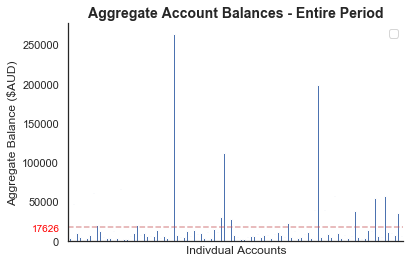

In [41]:
fig = plt.figure(figsize=(12,6))
agg_bal.plot(kind='bar')
plt.xticks([])
plt.axhline(mean_balance, c='r', linestyle='--', alpha=0.5)
plt.text(-11.5, mean_balance - 5000, "{}".format(mean_balance), color='red')
plt.ylabel("Aggregate Balance ($AUD)")
plt.xlabel("Indivdual Accounts")
plt.title("Aggregate Account Balances - Entire Period", fontsize=14, fontweight='bold')
plt.legend([])
sns.despine()

plt.savefig('agg_bal.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

The above bar graph shows the individual aggregate balances of each individuals account for the whole duration (August to September). We can see that a few individuals have a total aggregate balance above 100,000 dollars and a few with balances above 50,000 dollars. However, majority of the accounts have aggregate balances that fall below or around the mean aggregate balance value of 17,626 dollars.